In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets
%matplotlib inline

## DBSCAN 

(1)Visulization DBSCAN.

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

(2) Sklearn.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

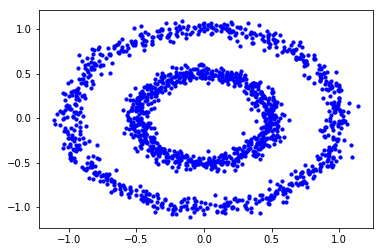

In [5]:
#Toy Example
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)[0]
data=noisy_circles
plt.scatter(data[:,0],data[:,1],s=10,c="b",cmap=plt.cm.cool)
plt.show()

### Practice One: Try different eps and min_samples to compare the clustering results. 

Hint: you can write a function with inputs: data, eps, and min_samples. Output(or just show) could be the figure with the clustering results. And then you could play with different inputs to see how DBSCAN works. 

### Anomaly("Dense") Detection using DBSCAN.

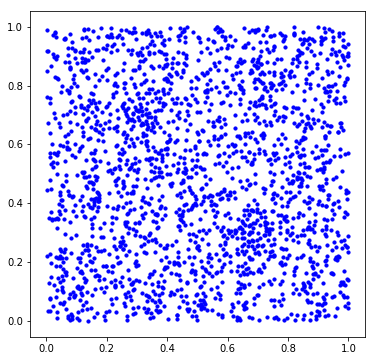

In [18]:
X2=np.asarray(pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/DenseDetection.csv"))
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0],X2[:,1],s=10,c="b",cmap=plt.cm.cool)
plt.show()

#### Our approach:

Scan through a wide range of parameter values. Choose values
where # of points assigned to clusters is >0 but <10% of the data.

eps: np.logspace(np.log10(max_eps)-5,np.log10(max_eps),50)

n_samples: np.linspace(20,100,10,endpoint=True)

eps = 0.0294458300716 , min_samples = 20.0 , num_detected_points = 20


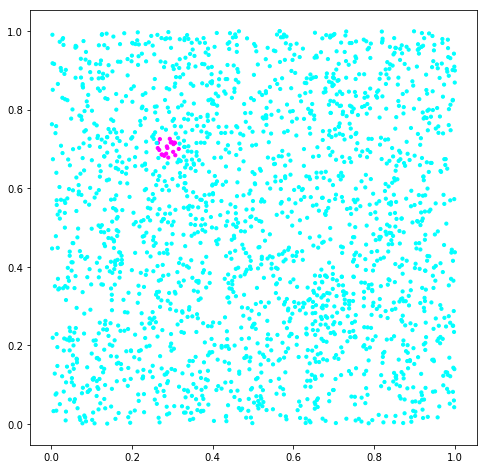

eps = 0.0372447117807 , min_samples = 20.0 , num_detected_points = 168


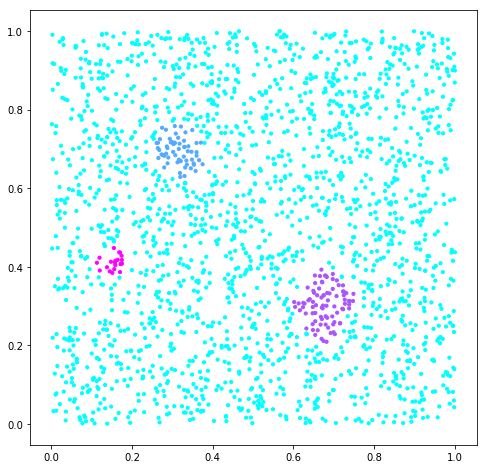

eps = 0.0471091679961 , min_samples = 28.8888888889 , num_detected_points = 171


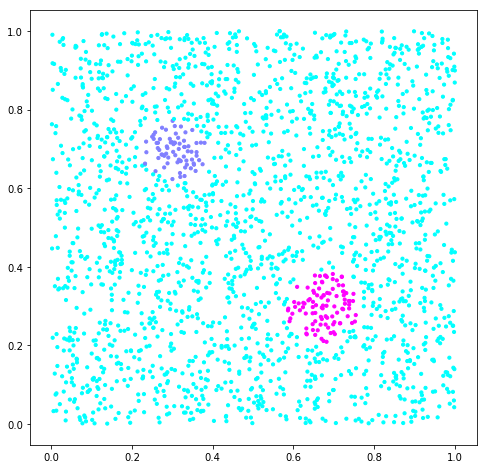

eps = 0.0471091679961 , min_samples = 37.7777777778 , num_detected_points = 43


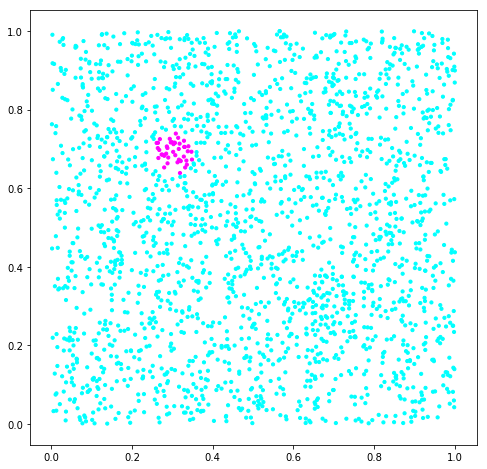

eps = 0.0595862769015 , min_samples = 46.6666666667 , num_detected_points = 188


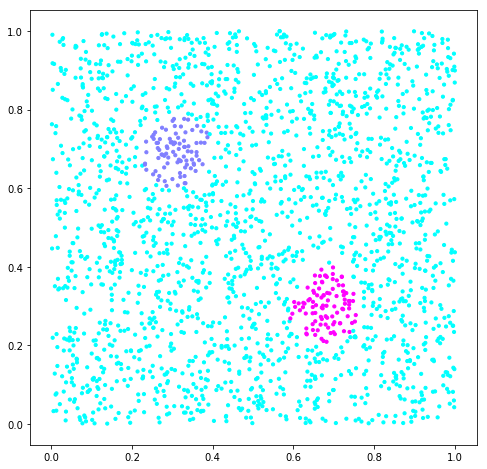

eps = 0.0595862769015 , min_samples = 55.5555555556 , num_detected_points = 56


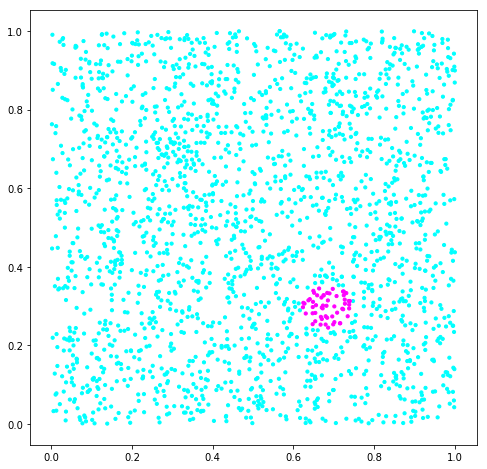

eps = 0.0753680131919 , min_samples = 73.3333333333 , num_detected_points = 87


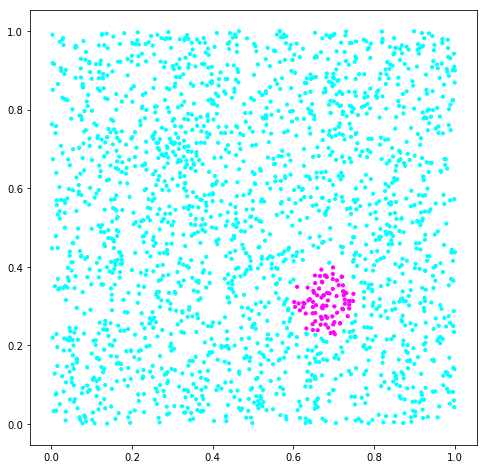

eps = 0.0953296246698 , min_samples = 100.0 , num_detected_points = 168


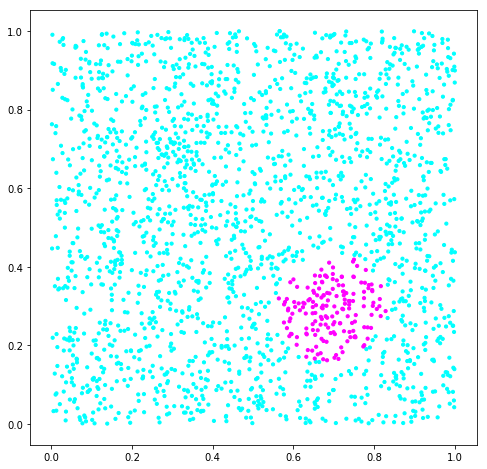

In [19]:
total_num_samples = len(X2[:,0])
max_eps = max(np.max(X2[:,0])-np.min(X2[:,0]),np.max(X2[:,1])-np.min(X2[:,1]))

for eps in np.logspace(np.log10(max_eps)-5,np.log10(max_eps),50):
    for min_samples in np.linspace(20,100,10,endpoint=True):
        db = DBSCAN(eps, min_samples).fit(X2)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            dbb=db
            plt.figure(figsize=(8,8))
            print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
            plt.scatter(X2[:,0],X2[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()

#### Ground Truth:

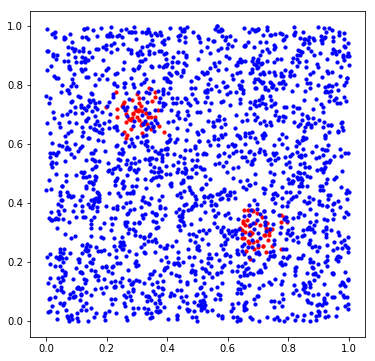

In [20]:
np.random.seed(1000)
centers = [[0.3, 0.7],[0.7, 0.3]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.04,
                            random_state=0)
no_structure = np.random.rand(2000, 2)
X2=np.append(X,no_structure,axis=0)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],s=10,c="r",cmap=plt.cm.cool)
plt.scatter(no_structure[:,0],no_structure[:,1],c='b',s=10,cmap=plt.cm.cool)
plt.show()

## Practice. 

Find out which neighborhoods(see map below) that have more serious rat problem.

<img src="Manhattan neighborhood map.png" width=600 height=400>

In [22]:
# Data.
ratdata = pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/Manhattan 311 Rodent Complaint Locations 2016.csv").values
ratdata

array([[1000980,  228602],
       [1000980,  228602],
       [ 997751,  223053],
       ..., 
       [ 989920,  211497],
       [ 990833,  218237],
       [ 990833,  218237]])

#### Hints:

step one: Decide the searching domain for eps and min_samples.

step two: Choose values where number of points assigned to clusters is >0 but <10% of the data.

step three: Write a loop to search over the domain defined in step one and use the rule you defined in step two to print out your results.